<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Add-number-of-tokens" data-toc-modified-id="Add-number-of-tokens-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Add number of tokens</a></span></li><li><span><a href="#Daten-bereinigen" data-toc-modified-id="Daten-bereinigen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Daten bereinigen</a></span></li><li><span><a href="#Stemming" data-toc-modified-id="Stemming-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stemming</a></span></li><li><span><a href="#Anzahl-der-Artists-und-Songs,-dazugehörige-Verteilungen" data-toc-modified-id="Anzahl-der-Artists-und-Songs,-dazugehörige-Verteilungen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Anzahl der Artists und Songs, dazugehörige Verteilungen</a></span></li><li><span><a href="#Anzahl-der-Artikel-pro-Kategorie" data-toc-modified-id="Anzahl-der-Artikel-pro-Kategorie-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Anzahl der Artikel pro Kategorie</a></span></li><li><span><a href="#Textlänge-pro-Kategorie" data-toc-modified-id="Textlänge-pro-Kategorie-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Textlänge pro Kategorie</a></span></li><li><span><a href="#POS" data-toc-modified-id="POS-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>POS</a></span></li><li><span><a href="#POS-Tagging" data-toc-modified-id="POS-Tagging-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>POS Tagging</a></span></li><li><span><a href="#Visualisierung" data-toc-modified-id="Visualisierung-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Visualisierung</a></span></li></ul></div>

## Preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')



In [6]:
df = pd.read_csv('../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv')
#del df['Unnamed: 0']
df.head(2)

Unnamed: 0  category filename                              title  \
0           0  business  001.txt  Ad sales boost Time Warner profit   
1           1  business  002.txt   Dollar gains on Greenspan speech   

                                             content  number_of_tokens  \
0   Quarterly profits at US media giant TimeWarne...             415.0   
1   The dollar has hit its highest level against ...             379.0   

   number_of_types                                       stemmed_text  \
0            244.0   quarterli profit at US media giant timewarn j...   
1            230.0   the dollar ha hit it highest level against th...   

                                            POS_tags  \
0  ['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...   
1  ['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...   

                                                 POS  nouns  adjectives  verb  
0  high fourth own fourth underlying exceptional ...   74.0        22.0   1.0  
1  late recent sanguine current current next shar...   66.0        30.0   9.0

## Add number of tokens

In [31]:
from collections import Counter

for i,row in df.iterrows():
    c = Counter(row.content.split())
    df.at[i, 'number_of_tokens'] = sum(c.values())
    df.at[i, 'number_of_types'] = int(len(c))

In [32]:
df.head(5)

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  number_of_tokens  \
0   Quarterly profits at US media giant TimeWarne...             415.0   
1   The dollar has hit its highest level against ...             379.0   
2   The owners of embattled Russian oil giant Yuk...             258.0   
3   British Airways has blamed high fuel prices f...             400.0   
4   Shares in UK drinks and food firm Allied Dome...             260.0   

   number_of_types  
0            244.0  
1            230.0  
2            168.0  
3            256.0  
4            178.0

In [33]:
df.content.tolist()

[' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers for high

## Daten bereinigen

In [10]:
for i, row in df.iterrows():
    df.at[i, 'content'] = row.content.replace(',',' ').replace('(',' ').replace('\ ',' ').replace(')',' ').replace("\'s", "'s").lower()
df.head(5)

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  number_of_tokens  \
0   quarterly profits at us media giant timewarne...             415.0   
1   the dollar has hit its highest level against ...             379.0   
2   the owners of embattled russian oil giant yuk...             258.0   
3   british airways has blamed high fuel prices f...             400.0   
4   shares in uk drinks and food firm allied dome...             260.0   

   number_of_types                                       stemmed_text  \
0            244.0   quarterli profit at US media giant timewarn j...   
1            230.0   the dollar ha hit it highest level against th...   
2            168.0   the owner of embattl russian oil giant yuko a...   
3            256.0   british airway ha blame high fuel price for a...   
4            178.0   share in UK drink and food firm alli domecq h...   

                                            POS_tags  \
0  ['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...   
1  ['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...   
2  ['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...   
3  ['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...   
4  ['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...   

                                                 POS  nouns  adjectives  verb  
0  high fourth own fourth underlying exceptional ...   74.0        22.0   1.0  
1  late recent sanguine current current next shar...   66.0        30.0   9.0  
2  Russian former similar foreign Legal such real...   48.0        12.0   3.0  
3  high pre - tax chief respectable third full la...   77.0        31.0   2.0  
4  French last major global top other Last LVMH b...   42.0        13.0   2.0

In [11]:
#del df['Unnamed: 0']
df.head(2)

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   

                                             content  number_of_tokens  \
0   quarterly profits at us media giant timewarne...             415.0   
1   the dollar has hit its highest level against ...             379.0   

   number_of_types                                       stemmed_text  \
0            244.0   quarterli profit at US media giant timewarn j...   
1            230.0   the dollar ha hit it highest level against th...   

                                            POS_tags  \
0  ['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...   
1  ['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...   

                                                 POS  nouns  adjectives  verb  
0  high fourth own fourth underlying exceptional ...   74.0        22.0   1.0  
1  late recent sanguine current current next shar...   66.0        30.0   9.0

In [12]:
df.content.to_list()

[' quarterly profits at us media giant timewarner jumped 76% to $1.13bn  £600m  for the three months to december  from $639m year-earlier.  the firm  which is now one of the biggest investors in google  benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros  and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business  aol  had has mixed fortunes. it lost 464 000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however  the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol\'s existing customers for high

## Stemming

In [35]:
import spacy
import en_core_web_sm
en_core_web_sm.load()
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

sentence = df.content[0]

ps = PorterStemmer()

for i, row in df.iterrows():
    words = word_tokenize(row.content)
    sent = ""
    for word in words:
        sent = sent + " " + ps.stem(word)
    df.at[i,"stemmed_text"] = sent
#songs

In [36]:
df

category filename                              title  \
0     business  001.txt  Ad sales boost Time Warner profit   
1     business  002.txt   Dollar gains on Greenspan speech   
2     business  003.txt  Yukos unit buyer faces loan claim   
3     business  004.txt  High fuel prices hit BA's profits   
4     business  005.txt  Pernod takeover talk lifts Domecq   
...        ...      ...                                ...   
2220      tech  397.txt   BT program to beat dialler scams   
2221      tech  398.txt    Spam e-mails tempt net shoppers   
2222      tech  399.txt            Be careful how you code   
2223      tech  400.txt    US cyber security chief resigns   
2224      tech  401.txt   Losing yourself in online gaming   

                                                content  number_of_tokens  \
0      Quarterly profits at US media giant TimeWarne...             415.0   
1      The dollar has hit its highest level against ...             379.0   
2      The owners of embattled Russian oil giant Yuk...             258.0   
3      British Airways has blamed high fuel prices f...             400.0   
4      Shares in UK drinks and food firm Allied Dome...             260.0   
...                                                 ...               ...   
2220   BT is introducing two initiatives to help bea...             414.0   
2221   Computer users across the world continue to i...             352.0   
2222   A new European directive could put software w...            1045.0   
2223   The man making sure US computer networks are ...             374.0   
2224   Online role playing games are time-consuming,...            2964.0   

      number_of_types                                       stemmed_text  
0               244.0   quarterli profit at US media giant timewarn j...  
1               230.0   the dollar ha hit it highest level against th...  
2               168.0   the owner of embattl russian oil giant yuko a...  
3               256.0   british airway ha blame high fuel price for a...  
4               178.0   share in UK drink and food firm alli domecq h...  
...               ...                                                ...  
2220            259.0   BT is introduc two initi to help beat rogu di...  
2221            220.0   comput user across the world continu to ignor...  
2222            548.0   A new european direct could put softwar write...  
2223            208.0   the man make sure US comput network are safe ...  
2224           1137.0   onlin role play game are time-consum , but en...  

[2225 rows x 7 columns]

In [38]:
#df.to_csv("BBC/bbcNews_stemm_types_tokens.csv")

## Anzahl der Artists und Songs, dazugehörige Verteilungen

In [14]:
from collections import Counter

for i,row in df.iterrows():
    c = Counter(row.content.split())
    df.at[i, 'number_of_tokens'] = sum(c.values())
    df.at[i, 'number_of_types'] = int(len(c))

In [15]:
categorys = np.unique(df.category)
print(len(np.unique(df.category)))
# np.unique(songs.decades)

5


In [16]:
mean ={}
for a in categorys:
    mean[a] = int(np.mean(df.number_of_tokens[df.category==a]))

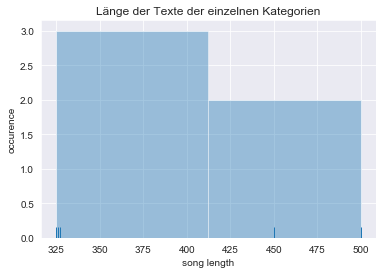

In [17]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Länge der Texte der einzelnen Kategorien")
#plt.savefig("../../images/Bilder_Abschlusspräsi/preprocessing/songlength_alterdatensatz")
plt.show()

## Anzahl der Artikel pro Kategorie

Text(0, 0.5, 'Anzahl')

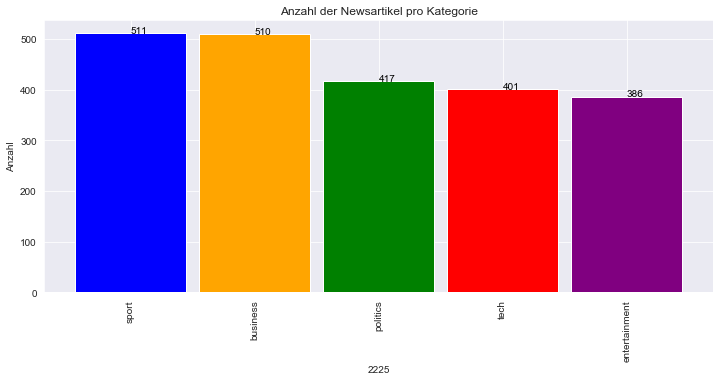

In [19]:
s = df['category'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.category + 0.2 , v.category, color='black')

ax.set_xlabel(len(df.category))
plt.title("Anzahl der Newsartikel pro Kategorie")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")


# fig, ax = plt.subplots(figsize=(12,5))
# ax = sns.countplot(x = df.category)
# ax.set_xlabel("Kategorien")
# plt.title("Anzahl der Newsartikel pro Kategorie")
# #plt.savefig("songs_per_genre")

## Textlänge pro Kategorie

Text(0.5, 1.0, 'Länge der Artikel pro Kategorie')

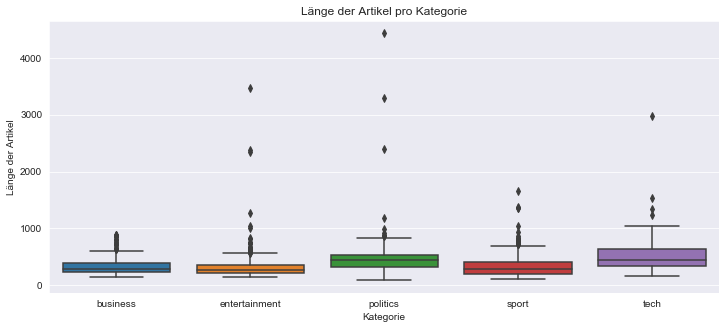

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=df.category, y=df.number_of_tokens)
ax.set_ylabel("Länge der Artikel")
ax.set_xlabel("Kategorie")
plt.title("Länge der Artikel pro Kategorie")
#plt.savefig("songlength_per_genre")

## POS

In [69]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import regex as re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')

import spacy
from spacy import displacy

import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Günther\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
news = pd.read_csv("BBC/bbcNews_stemm_types_tokens.csv")
news["POS_tags"] = "0"
news['POS'] = '0'
news.head(5)

Unnamed: 0  category filename                              title  \
0           0  business  001.txt  Ad sales boost Time Warner profit   
1           1  business  002.txt   Dollar gains on Greenspan speech   
2           2  business  003.txt  Yukos unit buyer faces loan claim   
3           3  business  004.txt  High fuel prices hit BA's profits   
4           4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  number_of_tokens  \
0   Quarterly profits at US media giant TimeWarne...             415.0   
1   The dollar has hit its highest level against ...             379.0   
2   The owners of embattled Russian oil giant Yuk...             258.0   
3   British Airways has blamed high fuel prices f...             400.0   
4   Shares in UK drinks and food firm Allied Dome...             260.0   

   number_of_types                                       stemmed_text  \
0            244.0   quarterli profit at US media giant timewarn j...   
1            230.0   the dollar ha hit it highest level against th...   
2            168.0   the owner of embattl russian oil giant yuko a...   
3            256.0   british airway ha blame high fuel price for a...   
4            178.0   share in UK drink and food firm alli domecq h...   

  POS_tags POS  
0        0   0  
1        0   0  
2        0   0  
3        0   0  
4        0   0

In [71]:
tokens = []
for i, row in news.iterrows():
    doc = nlp(row.content)
    for token in doc:
        d = {"text":token.text, "lemma":token.lemma_, "pos":token.pos_, "tag":token.tag_, "dep":token.dep_,"shape":token.shape_, "alpha":token.is_alpha, "stop":token.is_stop}
        tokens.append(d)
    pos = pd.DataFrame(data=tokens)
    tokens = []  
    x = list(pos[pos.tag=="JJ"].text) + list(pos[pos.tag=="NN"].text) + list(pos[pos.tag=="VBP"].text)
    x = ' '.join(x)
    news.at[i,'POS'] = x
    
    news.at[i, 'nouns'] = len(pos[pos.tag=="NN"].text)
    news.at[i, 'adjectives'] = len(pos[pos.tag=="JJ"].text)
    news.at[i, 'verb'] = len(pos[pos.tag=="VBP"].text)    

In [72]:
news.head(5)

Unnamed: 0  category filename                              title  \
0           0  business  001.txt  Ad sales boost Time Warner profit   
1           1  business  002.txt   Dollar gains on Greenspan speech   
2           2  business  003.txt  Yukos unit buyer faces loan claim   
3           3  business  004.txt  High fuel prices hit BA's profits   
4           4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  number_of_tokens  \
0   Quarterly profits at US media giant TimeWarne...             415.0   
1   The dollar has hit its highest level against ...             379.0   
2   The owners of embattled Russian oil giant Yuk...             258.0   
3   British Airways has blamed high fuel prices f...             400.0   
4   Shares in UK drinks and food firm Allied Dome...             260.0   

   number_of_types                                       stemmed_text  \
0            244.0   quarterli profit at US media giant timewarn j...   
1            230.0   the dollar ha hit it highest level against th...   
2            168.0   the owner of embattl russian oil giant yuko a...   
3            256.0   british airway ha blame high fuel price for a...   
4            178.0   share in UK drink and food firm alli domecq h...   

  POS_tags                                                POS  nouns  \
0        0  high fourth own fourth underlying exceptional ...   74.0   
1        0  late recent sanguine current current next shar...   66.0   
2        0  Russian former similar foreign Legal such real...   48.0   
3        0  high pre - tax chief respectable third full la...   77.0   
4        0  French last major global top other Last LVMH b...   42.0   

   adjectives  verb  
0        22.0   1.0  
1        30.0   9.0  
2        12.0   3.0  
3        31.0   2.0  
4        13.0   2.0

In [73]:
news.POS[4]

'French last major global top other Last LVMH big such ripe problematic fast food firm speculation target takeover firm bid target % % purchase third giant move market leader market value % capitalisation year premier whisky luxury firm whisky rum wine rum brandy vodka whisky snack food ice cream consolidation portfolio debt purchase performance food have include'

In [74]:
for i, row in news.iterrows():
    tokens = []
    doc = nlp(row.content)
    for token in doc:
        d = {"text":token.text, "lemma":token.lemma_, "pos":token.pos_, "tag":token.tag_, "dep":token.dep_,"shape":token.shape_, "alpha":token.is_alpha, "stop":token.is_stop}
        tokens.append(token.tag_)
    news.at[i,'POS_tags'] = tokens

In [75]:
news

Unnamed: 0  category filename                              title  \
0              0  business  001.txt  Ad sales boost Time Warner profit   
1              1  business  002.txt   Dollar gains on Greenspan speech   
2              2  business  003.txt  Yukos unit buyer faces loan claim   
3              3  business  004.txt  High fuel prices hit BA's profits   
4              4  business  005.txt  Pernod takeover talk lifts Domecq   
...          ...       ...      ...                                ...   
2220        2220      tech  397.txt   BT program to beat dialler scams   
2221        2221      tech  398.txt    Spam e-mails tempt net shoppers   
2222        2222      tech  399.txt            Be careful how you code   
2223        2223      tech  400.txt    US cyber security chief resigns   
2224        2224      tech  401.txt   Losing yourself in online gaming   

                                                content  number_of_tokens  \
0      Quarterly profits at US media giant TimeWarne...             415.0   
1      The dollar has hit its highest level against ...             379.0   
2      The owners of embattled Russian oil giant Yuk...             258.0   
3      British Airways has blamed high fuel prices f...             400.0   
4      Shares in UK drinks and food firm Allied Dome...             260.0   
...                                                 ...               ...   
2220   BT is introducing two initiatives to help bea...             414.0   
2221   Computer users across the world continue to i...             352.0   
2222   A new European directive could put software w...            1045.0   
2223   The man making sure US computer networks are ...             374.0   
2224   Online role playing games are time-consuming,...            2964.0   

      number_of_types                                       stemmed_text  \
0               244.0   quarterli profit at US media giant timewarn j...   
1               230.0   the dollar ha hit it highest level against th...   
2               168.0   the owner of embattl russian oil giant yuko a...   
3               256.0   british airway ha blame high fuel price for a...   
4               178.0   share in UK drink and food firm alli domecq h...   
...               ...                                                ...   
2220            259.0   BT is introduc two initi to help beat rogu di...   
2221            220.0   comput user across the world continu to ignor...   
2222            548.0   A new european direct could put softwar write...   
2223            208.0   the man make sure US comput network are safe ...   
2224           1137.0   onlin role play game are time-consum , but en...   

                                               POS_tags  \
0     [_SP, NNP, NNS, IN, NNP, NNS, NN, NNP, VBD, CD...   
1     [_SP, DT, NN, VBZ, VBN, PRP$, JJS, NN, IN, DT,...   
2     [_SP, DT, NNS, IN, VBN, JJ, NN, NN, NNP, VBP, ...   
3     [_SP, NNP, NNP, VBZ, VBN, JJ, NN, NNS, IN, DT,...   
4     [_SP, NNP, IN, NNP, NNS, CC, NN, NN, NNP, NNP,...   
...                                                 ...   
2220  [_SP, NNP, VBZ, VBG, CD, NNS, TO, VB, VB, JJ, ...   
2221  [_SP, NNP, NNS, IN, DT, NN, VBP, TO, VB, NN, N...   
2222  [_SP, DT, JJ, JJ, NN, MD, VB, NN, NNS, IN, NN,...   
2223  [_SP, DT, NN, VBG, JJ, NNP, NN, NNS, VBP, JJ, ...   
2224  [_SP, JJ, NN, NN, NNS, VBP, NN, HYPH, VBG, ,, ...   

                                                    POS  nouns  adjectives  \
0     high fourth own fourth underlying exceptional ...   74.0        22.0   
1     late recent sanguine current current next shar...   66.0        30.0   
2     Russian former similar foreign Legal such real...   48.0        12.0   
3     high pre - tax chief respectable third full la...   77.0        31.0   
4     French last major global top other Last LVMH b...   42.0        13.0   
...                                                 ...    ...         ...   
2220  rogue net net able

In [76]:
news.drop("Unnamed: 0", axis=1, inplace=True)

In [77]:
news.head(2)

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   

                                             content  number_of_tokens  \
0   Quarterly profits at US media giant TimeWarne...             415.0   
1   The dollar has hit its highest level against ...             379.0   

   number_of_types                                       stemmed_text  \
0            244.0   quarterli profit at US media giant timewarn j...   
1            230.0   the dollar ha hit it highest level against th...   

                                            POS_tags  \
0  [_SP, NNP, NNS, IN, NNP, NNS, NN, NNP, VBD, CD...   
1  [_SP, DT, NN, VBZ, VBN, PRP$, JJS, NN, IN, DT,...   

                                                 POS  nouns  adjectives  verb  
0  high fourth own fourth underlying exceptional ...   74.0        22.0   1.0  
1  late recent sanguine current current next shar...   66.0        30.0   9.0

In [78]:
news.to_csv("BBC/news_POS_POS_tags_nouns_adjectives_verb.csv")

## POS Tagging

In [79]:
tokens = []
for token in doc:
    d = {"text":token.text, "lemma":token.lemma_, "pos":token.pos_, "tag":token.tag_, "dep":token.dep_,"shape":token.shape_, "alpha":token.is_alpha, "stop":token.is_stop}
    tokens.append(d)
pos = pd.DataFrame(data=tokens)

In [80]:
pos

text    lemma    pos  tag       dep  shape  alpha   stop
0                       SPACE  _SP                   False  False
1      Online   online    ADJ   JJ      amod  Xxxxx   True  False
2        role     role   NOUN   NN  compound   xxxx   True  False
3     playing  playing   NOUN   NN  compound   xxxx   True  False
4       games     game   NOUN  NNS     nsubj   xxxx   True  False
...       ...      ...    ...  ...       ...    ...    ...    ...
3417      was       be    AUX  VBD      ROOT    xxx   True   True
3418      the      the    DET   DT       det    xxx   True   True
3419     days      day   NOUN  NNS      attr   xxxx   True  False
3420        !        !  PUNCT    .     punct      !  False  False
3421      LOL      LOL  PROPN  NNP      ROOT    XXX   True  False

[3422 rows x 8 columns]

In [82]:
#displacy.render(doc, style='dep')

## Visualisierung

In [22]:
df.head(2)

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   

                                             content  number_of_tokens  \
0   quarterly profits at us media giant timewarne...             417.0   
1   the dollar has hit its highest level against ...             380.0   

   number_of_types                                       stemmed_text  \
0            238.0   quarterli profit at US media giant timewarn j...   
1            224.0   the dollar ha hit it highest level against th...   

                                            POS_tags  \
0  ['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...   
1  ['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...   

                                                 POS  nouns  adjectives  verb  
0  high fourth own fourth underlying exceptional ...   74.0        22.0   1.0  
1  late recent sanguine current current next shar...   66.0        30.0   9.0

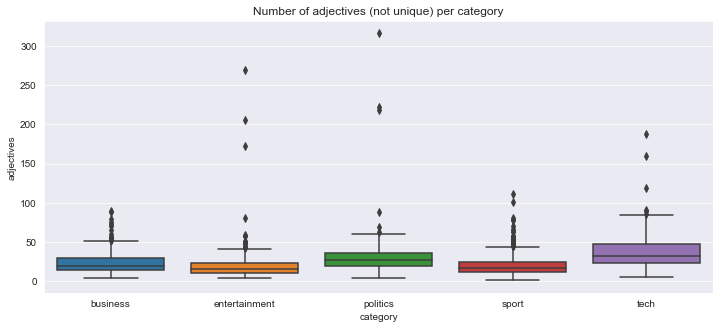

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=df.category, y=df.adjectives)
ax.set_xlabel("category")
plt.title("Number of adjectives (not unique) per category")
#plt.savefig("adjectives_per_category")

Text(0.5, 1.0, 'Number of nouns (not unique) per category')

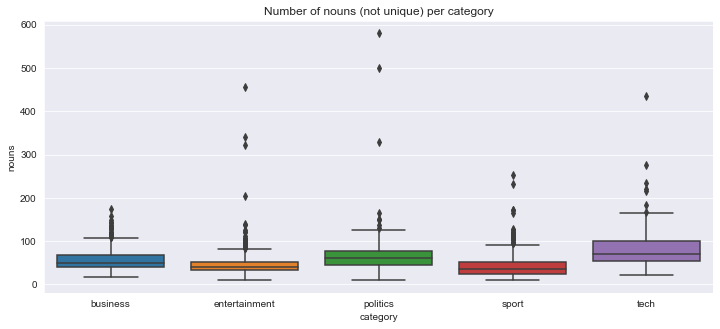

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=df.category, y=df.nouns)
ax.set_xlabel("category")
plt.title("Number of nouns (not unique) per category")
#plt.savefig("adjectives_per_category")

Text(0.5, 1.0, 'Number of verb (not unique) per category')

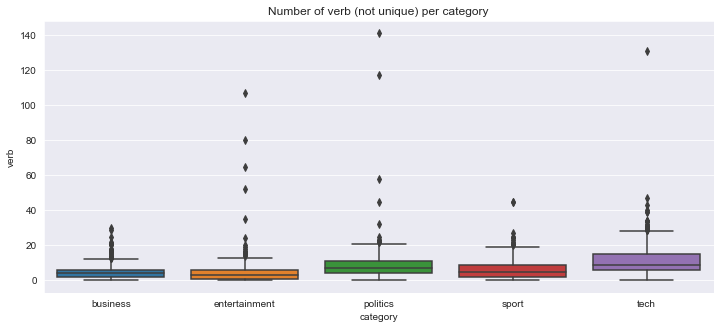

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=df.category, y=df.verb)
ax.set_xlabel("category")
plt.title("Number of verb (not unique) per category")
#plt.savefig("adjectives_per_category")

In [21]:
#print(pos.to_string())